In [81]:
import os
import squarify
import numpy as np

In [28]:
from scipy.ndimage import uniform_filter1d
from scipy.signal import savgol_filter
from scipy.stats import gaussian_kde
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
base_dir = '/ultralytics/examples/Work_dir/custom_dataset'

In [172]:
train_index_id = {'0' : 0, '1' : 0, '2' : 0, '3' : 0, '4' : 0, '5' : 0, '6' : 0}

In [173]:
valid_index_id = {'0' : 0, '1' : 0, '2' : 0, '3' : 0, '4' : 0, '5' : 0, '6' : 0}

In [174]:
test_index_id = {'0' : 0, '1' : 0, '2' : 0, '3' : 0, '4' : 0, '5' : 0, '6' : 0}

In [175]:
def count_num(file_path, index_id):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if parts:
            class_id = parts[0]
            if class_id in index_id:
                index_id[parts[0]] += 1

In [176]:
for folder in ['train']:
    labels_dir = os.path.join(base_dir, folder, 'labels')
    if os.path.exists(labels_dir):
        for file_name in os.listdir(labels_dir):
            if file_name.endswith('.txt'):
                file_path = os.path.join(labels_dir, file_name)
                count_num(file_path, train_index_id)

In [177]:
for folder in ['valid']:
    labels_dir = os.path.join(base_dir, folder, 'labels')
    if os.path.exists(labels_dir):
        for file_name in os.listdir(labels_dir):
            if file_name.endswith('.txt'):
                file_path = os.path.join(labels_dir, file_name)
                count_num(file_path, valid_index_id)

In [178]:
for folder in ['test']:
    labels_dir = os.path.join(base_dir, folder, 'labels')
    if os.path.exists(labels_dir):
        for file_name in os.listdir(labels_dir):
            if file_name.endswith('.txt'):
                file_path = os.path.join(labels_dir, file_name)
                count_num(file_path, test_index_id)

In [179]:
train_index_id

{'0': 2200, '1': 88742, '2': 3431, '3': 1035, '4': 20798, '5': 2818, '6': 500}

In [180]:
valid_index_id

{'0': 255, '1': 20024, '2': 600, '3': 154, '4': 4045, '5': 550, '6': 95}

In [181]:
test_index_id

{'0': 36, '1': 3529, '2': 39, '3': 0, '4': 470, '5': 78, '6': 0}

In [15]:
classes = ['emergency', 'car', 'van', 'truck', 'person', 'cyclist', 'tram']

In [16]:
trains = [2200, 88742, 3431, 1035, 20798, 2818, 500]

In [17]:
valids = [255, 20024, 600, 154, 4045, 550, 95]

In [18]:
tests = [36, 3529, 39, 0, 470, 78, 0]

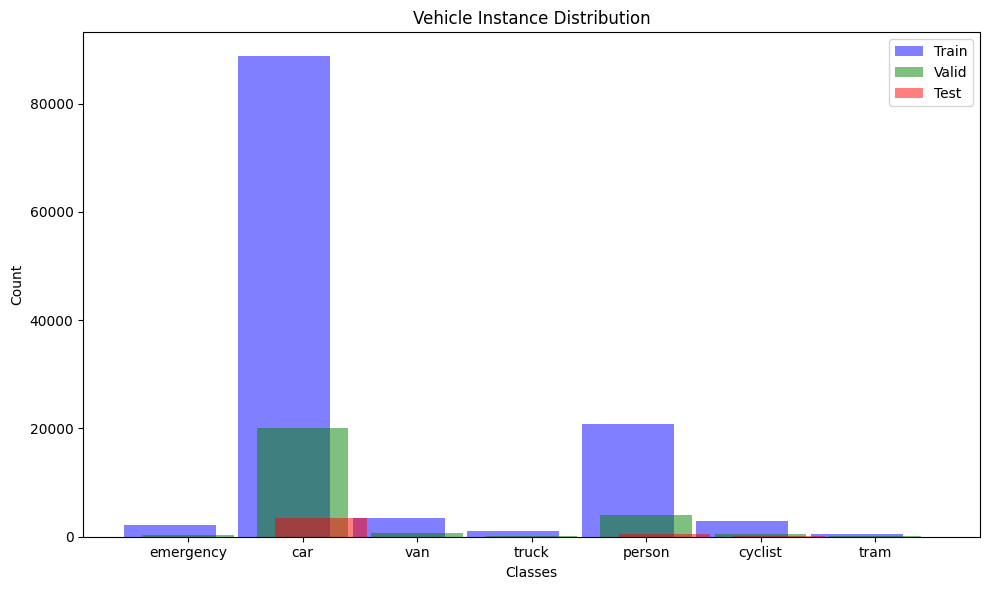

In [56]:
x = np.arange(len(classes))

# 막대 너비
bar_width = 0.8

# 플롯 생성
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width * 0.2, trains, width=bar_width, color='blue', alpha=0.5, label='Train')
plt.bar(x, valids, width=bar_width, color='green', alpha=0.5, label='Valid')
plt.bar(x + bar_width * 0.2, tests, width=bar_width, color='red', alpha=0.5, label='Test')

# x축과 y축 설정
plt.xticks(x, classes)
plt.ylabel('Count')
plt.xlabel('Classes')
plt.title('Vehicle Instance Distribution')
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

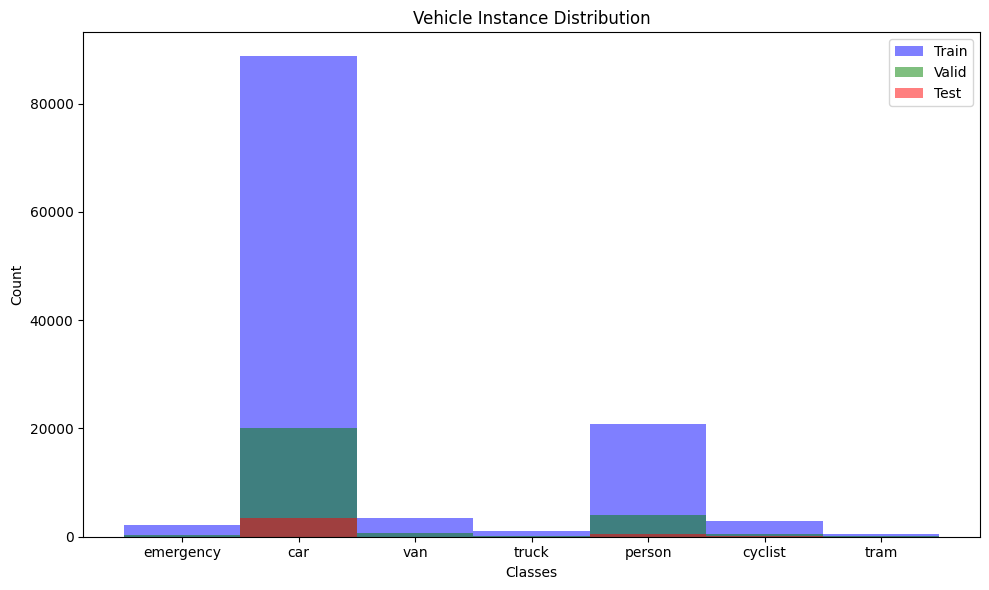

In [52]:
train_data = np.repeat(classes, trains)
valid_data = np.repeat(classes, valids)
test_data = np.repeat(classes, tests)

plt.figure(figsize=(10, 6))

plt.hist(train_data, bins=np.arange(len(classes) + 1) - 0.5, alpha=0.5, color='blue', label='Train')
plt.hist(valid_data, bins=np.arange(len(classes) + 1) - 0.5, alpha=0.5, color='green', label='Valid')
plt.hist(test_data, bins=np.arange(len(classes) + 1) - 0.5, alpha=0.5, color='red', label='Test')

plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=0)

plt.title('Vehicle Instance Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')

plt.legend()

plt.tight_layout()
plt.show()

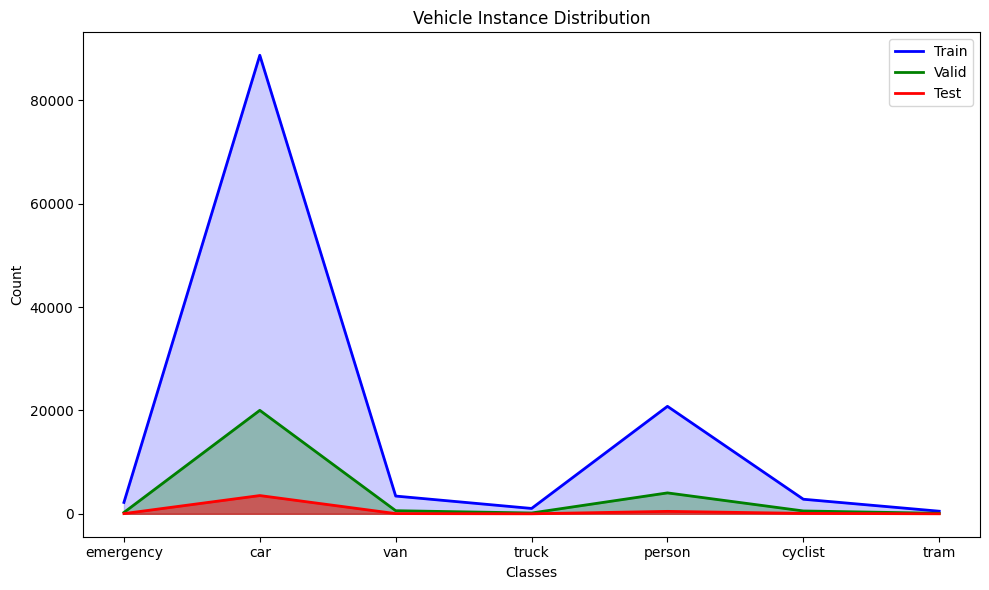

In [54]:
class_indices = np.arange(len(classes))

plt.figure(figsize=(10, 6))

plt.fill_between(class_indices, trains, color='blue', alpha=0.2)
plt.fill_between(class_indices, valids, color='green', alpha=0.3)
plt.fill_between(class_indices, tests, color='red', alpha=0.5)

plt.plot(class_indices, trains, label='Train', color='blue', linewidth=2)
plt.plot(class_indices, valids, label='Valid', color='green', linewidth=2)
plt.plot(class_indices, tests, label='Test', color='red', linewidth=2)

plt.xticks(ticks=class_indices, labels=classes)

plt.title('Vehicle Instance Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')

plt.legend()

plt.tight_layout()
plt.show()

In [184]:
trains_origin = [trains[0], sum(trains[1:])]
valids_origin = [valids[0], sum(valids[1:])]
tests_origin = [tests[0], sum(tests[1:])]

In [185]:
all_trains, all_valids, all_tests = [sum(trains_origin), sum(valids_origin), sum(tests_origin)]
rato_trains, rato_valids, rato_tests = [ 100*trains_origin[0]/all_trains, 100*valids_origin[0]/all_valids, 100*tests_origin[0]/all_tests]
rato_trains2, rato_valids2, rato_tests2 = [ 100*trains_origin[1]/all_trains, 100*valids_origin[1]/all_valids, 100*tests_origin[1]/all_tests]

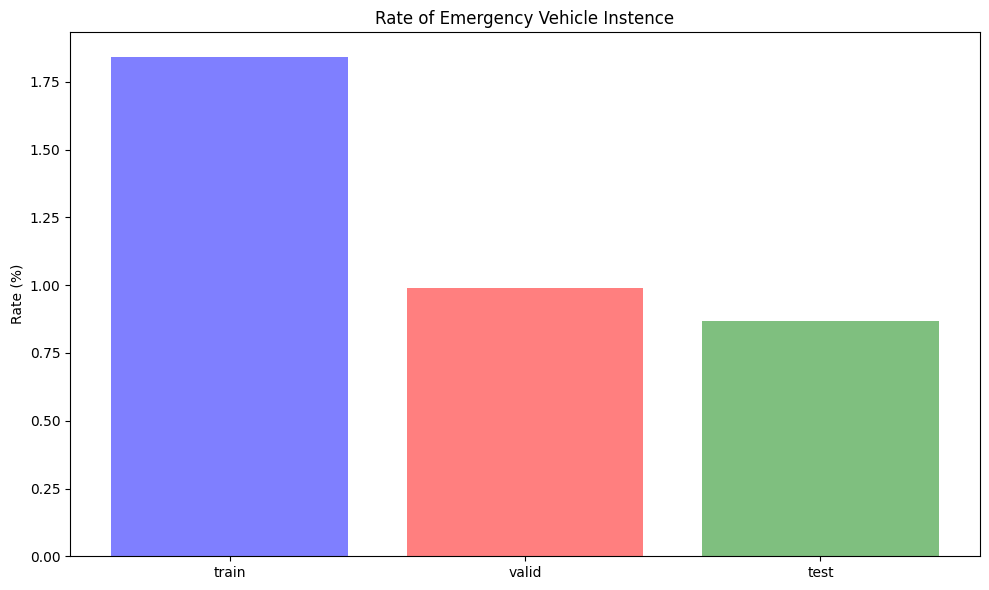

In [55]:
tasks = ['train', 'valid', 'test']

plt.figure(figsize=(10, 6))

plt.bar(0, [rato_trains], width=0.8, color='blue', alpha=0.5)
plt.bar(1, [rato_valids], width=0.8, color='red', alpha=0.5)
plt.bar(2, [rato_tests], width=0.8, color='green', alpha=0.5)

plt.xticks(ticks=np.arange(len(tasks)), labels=tasks, rotation=0)

plt.title('Rate of Emergency Vehicle Instence')
plt.ylabel('Rate (%)')

plt.tight_layout()
plt.show()

In [240]:
emergency_ratos = [rato_trains, rato_valids, rato_tests]
non_emergency_ratos = [rato_trains2, rato_valids2, rato_tests2]

In [241]:
enclass_tree = []

for ememe, non_ememe in zip(emergency_ratos, non_emergency_ratos):
    update_list = []
    for enen, nene in zip(enclass, [ememe, non_ememe]):
        if enen != 'emergency':
            new_enen = enen + '\n' + str(round(nene, 2)) + '%'
            update_list.append(new_enen)
        else:
            new_enen = enen + ' ' + str(round(nene, 2)) + '%'
            update_list.append(new_enen)
    enclass_tree.append(update_list)

In [242]:
print(enclass_tree[1][1])

non-emergency
99.01%


In [243]:
enclass_tree

[['emergency 1.84%', 'non-emergency\n98.16%'],
 ['emergency 0.99%', 'non-emergency\n99.01%'],
 ['emergency 0.87%', 'non-emergency\n99.13%']]

In [244]:
colors_celect = ['#FF9999', '#FFD966']

colors = {}

for sub_enclass_tree in enclass_tree:
    for tree_name, color in zip(sub_enclass_tree, colors_celect):
        colors[tree_name] = color

In [245]:
data_categories = ['Train', 'Valid', 'Test']
ratios = [trains_origin, valids_origin, tests_origin]

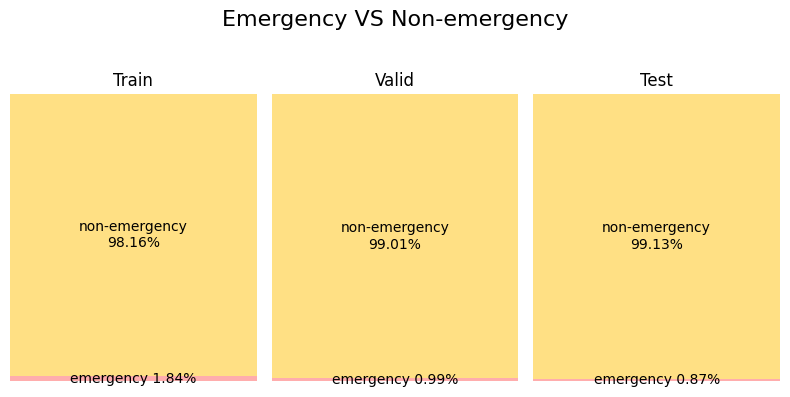

In [246]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

for i, (ax, ratio, nenclass) in enumerate(zip(axes, ratios, enclass_tree)):
    treemap_colors = [colors[name] for name in nenclass]
    
    # Squarify treemap 그리기
    squarify.plot(sizes=ratio, label=nenclass, color=treemap_colors, alpha=0.8, ax=ax)
    ax.set_title(data_categories[i])  # 제목 설정
    ax.axis('off')  # 축 숨김

# 메인 제목 추가
plt.suptitle("Emergency VS Non-emergency", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 메인 제목 공간 확보
plt.show()

In [69]:
enclass = ['emergency', 'non-emergency']
entrains = [1398, 2897]
envalids = [18, 52]
entests = [36, 120]

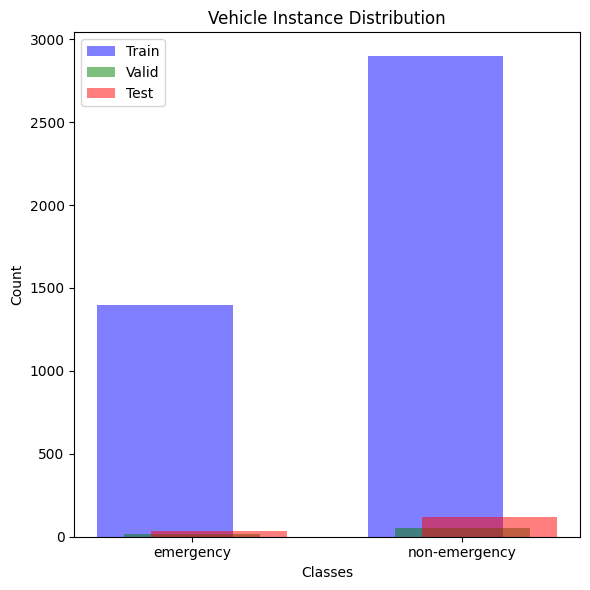

In [77]:
enx = np.arange(len(enclass))

# 막대 너비
bar_width = 0.5

# 플롯 생성
plt.figure(figsize=(6, 6))
plt.bar(enx - bar_width * 0.2, entrains, width=bar_width, color='blue', alpha=0.5, label='Train')
plt.bar(enx, envalids, width=bar_width, color='green', alpha=0.5, label='Valid')
plt.bar(enx + bar_width * 0.2, entests, width=bar_width, color='red', alpha=0.5, label='Test')

# x축과 y축 설정
plt.xticks(enx, enclass)
plt.ylabel('Count')
plt.xlabel('Classes')
plt.title('Vehicle Instance Distribution')
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

In [111]:
all_entrains, all_envalids, all_entests = [sum(entrains), sum(envalids), sum(entests)]
rato_entrains, rato_envalids, rato_entests = [ 100*entrains[0]/all_entrains, 100*envalids[0]/all_envalids, 100*entests[0]/all_entests]
rato_entrains2, rato_envalids2, rato_entests2 = [ 100*entrains[1]/all_entrains, 100*envalids[1]/all_envalids, 100*entests[1]/all_entests]

In [230]:
rato_envalids2

74.28571428571429

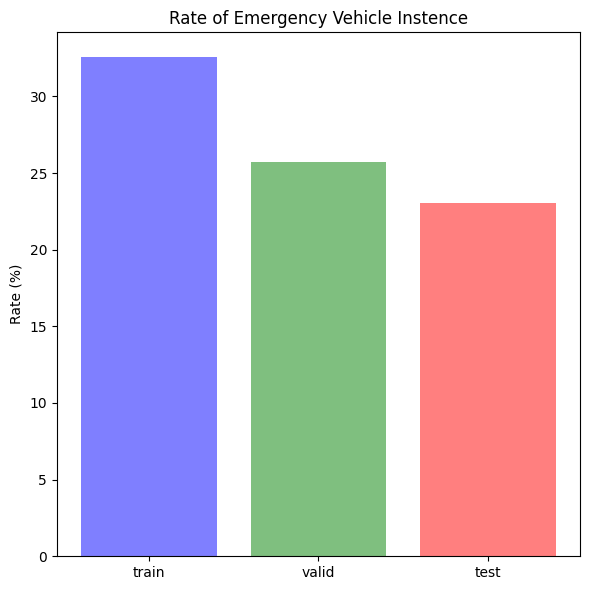

In [110]:
tasks = ['train', 'valid', 'test']

plt.figure(figsize=(6, 6))

plt.bar(0, [rato_entrains], width=0.8, color='blue', alpha=0.5)
plt.bar(1, [rato_envalids], width=0.8, color='green', alpha=0.5)
plt.bar(2, [rato_entests], width=0.8, color='red', alpha=0.5)

plt.xticks(ticks=np.arange(len(tasks)), labels=tasks, rotation=0)

plt.title('Rate of Emergency Vehicle Instence')
plt.ylabel('Rate (%)')

plt.tight_layout()
plt.show()

In [231]:
emergency_ratos = [rato_entrains, rato_envalids, rato_entests]
non_emergency_ratos = [rato_entrains2, rato_envalids2, rato_entests2]

In [232]:
enclass_tree = []

for ememe, non_ememe in zip(emergency_ratos, non_emergency_ratos):
    update_list = []
    for enen, nene in zip(enclass, [ememe, non_ememe]):
        new_enen = enen + '\n' + str(round(nene, 2)) + '%'
        update_list.append(new_enen)
    enclass_tree.append(update_list)

In [233]:
print(enclass_tree[1][1])

non-emergency
74.29%


In [234]:
enclass_tree

[['emergency\n32.55%', 'non-emergency\n67.45%'],
 ['emergency\n25.71%', 'non-emergency\n74.29%'],
 ['emergency\n23.08%', 'non-emergency\n76.92%']]

In [235]:
colors_celect = ['#FF9999', '#FFD966']

colors = {}

for sub_enclass_tree in enclass_tree:
    for tree_name, color in zip(sub_enclass_tree, colors_celect):
        colors[tree_name] = color

In [236]:
colors

{'emergency\n32.55%': '#FF9999',
 'non-emergency\n67.45%': '#FFD966',
 'emergency\n25.71%': '#FF9999',
 'non-emergency\n74.29%': '#FFD966',
 'emergency\n23.08%': '#FF9999',
 'non-emergency\n76.92%': '#FFD966'}

In [237]:
data_categories = ['Train', 'Valid', 'Test']
ratios = [entrains, envalids, entests]

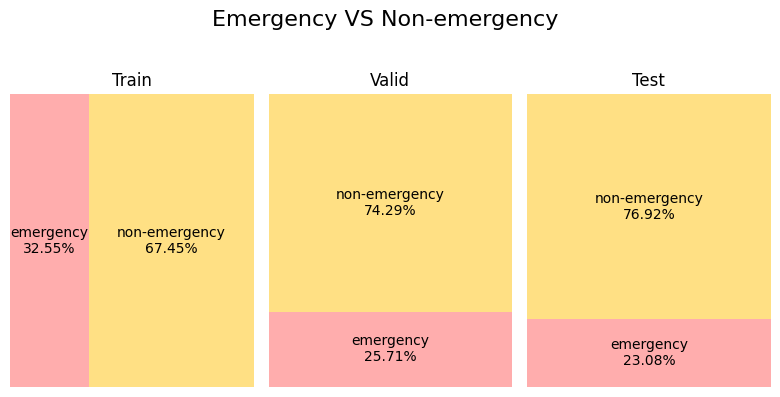

In [238]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

for i, (ax, ratio, nenclass) in enumerate(zip(axes, ratios, enclass_tree)):
    treemap_colors = [colors[name] for name in nenclass]
    
    # Squarify treemap 그리기
    squarify.plot(sizes=ratio, label=nenclass, color=treemap_colors, alpha=0.8, ax=ax)
    ax.set_title(data_categories[i])  # 제목 설정
    ax.axis('off')  # 축 숨김

# 메인 제목 추가
plt.suptitle("Emergency VS Non-emergency", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 메인 제목 공간 확보
plt.show()

In [219]:
dataset_name= ['E-N', 'EG', 'Kitti', 'Urban']
train_rato = [2598, 1549, 7008, 8845]
valid_rato = [44, 442, 1000, 2514]
test_rato = [44, 0, 0, 479]

In [220]:
colors = {
    'E-N': '#FF9999',  # 빨강 계열
    'EG': '#66B2FF',      # 파랑 계열
    'Kitti': '#99FF99',          # 초록 계열
    'Urban': '#FFD966'           # 노랑 계열
}

In [221]:
data_categories = ['Train', 'Valid', 'Test']
ratios = [train_rato, valid_rato, test_rato]

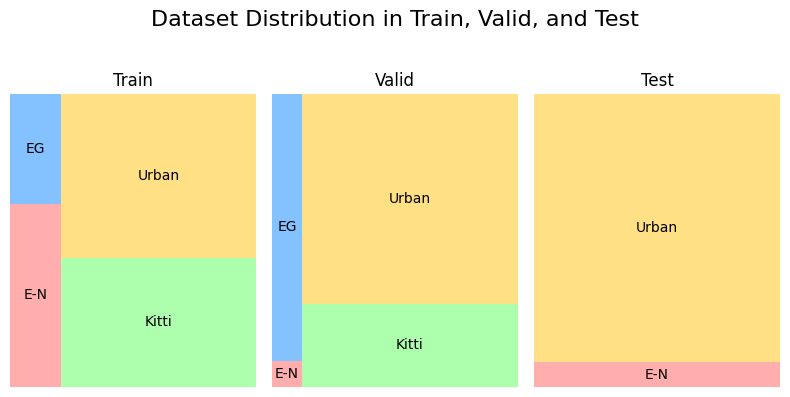

In [222]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

for i, (ax, ratio) in enumerate(zip(axes, ratios)):
    # Test 데이터에서는 Emergency와 Kitti를 제외
    if i == 2:
        filtered_dataset = [name for name, value in zip(dataset_name, ratio) if value > 0]
        filtered_ratio = [value for value in ratio if value > 0]
        treemap_colors = [colors[name] for name in filtered_dataset]
    else:
        filtered_dataset = dataset_name
        filtered_ratio = ratio
        treemap_colors = [colors[name] for name in dataset_name]
    
    # Squarify treemap 그리기
    squarify.plot(sizes=filtered_ratio, label=filtered_dataset, color=treemap_colors, alpha=0.8, ax=ax)
    ax.set_title(data_categories[i])  # 제목 설정
    ax.axis('off')  # 축 숨김

# 메인 제목 추가
plt.suptitle("Dataset Distribution in Train, Valid, and Test", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 메인 제목 공간 확보
plt.show()

In [104]:
dataset_name= ['E-N', 'EG', 'Kitti', 'Urban']
row_rato = [2760, 2218, 8008, 18949]
use_rato = [2760, 2218, 8008, 11838]

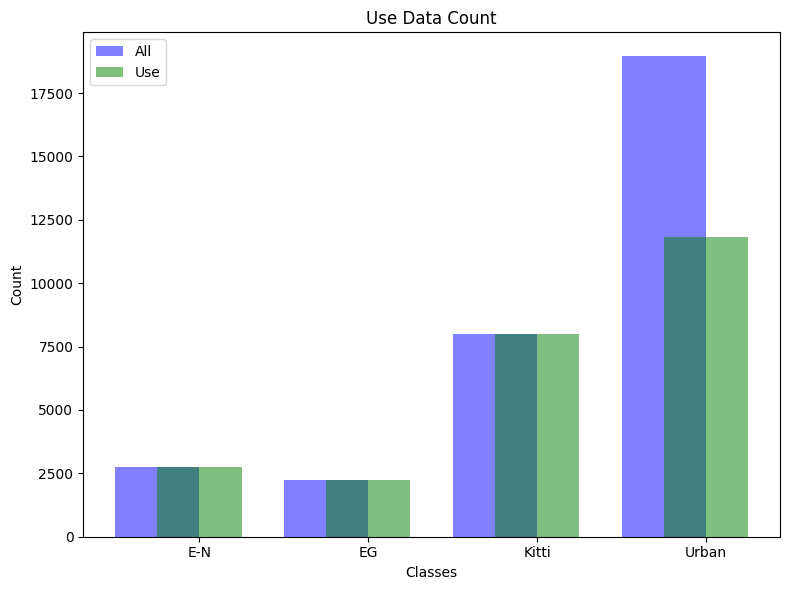

In [109]:
denx = np.arange(len(dataset_name))

# 막대 너비
bar_width = 0.5

# 플롯 생성
plt.figure(figsize=(8, 6))
plt.bar(denx - bar_width * 0.5, row_rato, width=bar_width, color='blue', alpha=0.5, label='All')
plt.bar(denx, use_rato, width=bar_width, color='green', alpha=0.5, label='Use')

# x축과 y축 설정
plt.xticks(denx, dataset_name)
plt.ylabel('Count')
plt.xlabel('Classes')
plt.title('Use Data Count')
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()